### LGBM & Logistic regression

In [1]:
# 패키지 불러오기
import pandas as pd
import numpy as np
import time
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from lightgbm import LGBMClassifier

In [48]:
# 데이터 불러오기
train_df = pd.read_csv("C:/Users/sumin/Bitamin/2학기/conference/bitamin_ChurnProject/data/preprocessed_data/train_data.csv")
valid_df = pd.read_csv("C:/Users/sumin/Bitamin/2학기/conference/bitamin_ChurnProject/data/preprocessed_data/valid_data.csv")

In [51]:
x_train = train_df.drop(columns = ['cust_no', 'label'])
x_valid = valid_df.drop(columns = ['cust_no', 'label'])
y_train = train_df['label']
y_valid = valid_df['label']

print("x_train.shape: ", x_train.shape)
print("x_valid.shape: ", x_valid.shape)
print("y_train.shape: ", y_train.shape)
print("y_valid.shape: ", y_valid.shape)

x_train.shape:  (125290, 83)
x_valid.shape:  (10000, 83)
y_train.shape:  (125290,)
y_valid.shape:  (10000,)


In [9]:
y_train.value_counts()

 1.0    80014
 0.0    26133
-1.0    19143
Name: label, dtype: int64

### 1. Logistic Regression

In [2]:
# data for train
tmp_train = x_train.dropna()
tmp_train_x = tmp_train.drop('I1', axis = 1)
tmp_train_y = tmp_train['I1']

tmp_valid = x_valid.dropna()
tmp_valid_x = tmp_valid.drop('I1', axis = 1)
tmp_valid_y = tmp_valid['I1']

# model training
# (train note)
# logistic regression : no convergence
# random forest(default) : train acc = 1.0 , valid acc = 0.65
# random forest(n_estimators = 100, max_depth = 15) : train acc = 0.77, valid acc = 0.63
# random forest(n_estimators = 500(default), max_depth = 15) : train acc = 0.77, valid acc = 0.64
start_T = time.time()
rf = RandomForestClassifier(max_depth = 15)
rf.fit(tmp_train_x, tmp_train_y)
end_T = time.time()

print("model training time : ", end_T - start_T)

# prediction and evaluation
# train data
tmp_train_pred_y = rf.predict(tmp_train_x)
print('Accuracy: {:.2f}'.format(accuracy_score(tmp_train_y, tmp_train_pred_y)))
print(confusion_matrix(tmp_train_y, tmp_train_pred_y))
print(classification_report(tmp_train_y, tmp_train_pred_y))

# valid data
tmp_valid_pred_y = rf.predict(tmp_valid_x)
print('Accuracy: {:.2f}'.format(accuracy_score(tmp_valid_y, tmp_valid_pred_y)))
print(confusion_matrix(tmp_valid_y, tmp_valid_pred_y))
print(classification_report(tmp_valid_y, tmp_valid_pred_y))

NameError: name 'x_train' is not defined

In [12]:
# data having null data
x_train.loc[x_train.I1.isna(), 'I1'] = rf.predict(x_train[x_train.I1.isna()].drop('I1', axis = 1))
x_valid.loc[x_valid.I1.isna(), 'I1'] = rf.predict(x_valid[x_valid.I1.isna()].drop('I1', axis = 1))

In [14]:
# tmp data save
x_train.to_csv('C:/Users/sumin/Bitamin/2학기/conference/bitamin_ChurnProject/data/x_train.csv', index = None)
x_valid.to_csv('C:/Users/sumin/Bitamin/2학기/conference/bitamin_ChurnProject/data/x_valid.csv', index = None)
y_train.to_csv('C:/Users/sumin/Bitamin/2학기/conference/bitamin_ChurnProject/data/y_train.csv', index = None)
y_valid.to_csv('C:/Users/sumin/Bitamin/2학기/conference/bitamin_ChurnProject/data/y_valid.csv', index = None)

In [45]:
x_train = pd.read_csv('C:/Users/sumin/Bitamin/2학기/conference/bitamin_ChurnProject/data/x_train.csv')
x_valid = pd.read_csv('C:/Users/sumin/Bitamin/2학기/conference/bitamin_ChurnProject/data/x_valid.csv')
y_train = pd.read_csv('C:/Users/sumin/Bitamin/2학기/conference/bitamin_ChurnProject/data/y_train.csv')
y_valid = pd.read_csv('C:/Users/sumin/Bitamin/2학기/conference/bitamin_ChurnProject/data/y_valid.csv')

#### modeling

In [46]:
y_train = np.array(y_train).ravel()
y_valid = np.array(y_valid).ravel()

In [47]:
start_T = time.time()
lr = LogisticRegression(solver='lbfgs', multi_class='multinomial', C = 0.895, max_iter = 242) # 다항분류
lr.fit(x_train, y_train)
end_T = time.time()
print("model training time: ", end_T - start_T)

# prediction and evaluation
# train data
train_pred_y = lr.predict(x_train)
print('Accuracy: {:.2f}'.format(accuracy_score(y_train, train_pred_y)))
print(confusion_matrix(y_train, train_pred_y))
print(classification_report(y_train, train_pred_y))

# valid data
valid_pred_y = lr.predict(x_valid)
print('Accuracy: {:.2f}'.format(accuracy_score(y_valid, valid_pred_y)))
print(confusion_matrix(y_valid, valid_pred_y))
print(classification_report(y_valid, valid_pred_y))

c:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



model training time:  24.298033714294434
Accuracy: 0.64
[[  242   156 18745]
 [   44   259 25830]
 [  119   397 79498]]
              precision    recall  f1-score   support

        -1.0       0.60      0.01      0.02     19143
         0.0       0.32      0.01      0.02     26133
         1.0       0.64      0.99      0.78     80014

    accuracy                           0.64    125290
   macro avg       0.52      0.34      0.27    125290
weighted avg       0.57      0.64      0.51    125290

Accuracy: 0.64
[[  17    7 1527]
 [   1   17 1992]
 [   6   29 6404]]
              precision    recall  f1-score   support

        -1.0       0.71      0.01      0.02      1551
         0.0       0.32      0.01      0.02      2010
         1.0       0.65      0.99      0.78      6439

    accuracy                           0.64     10000
   macro avg       0.56      0.34      0.27     10000
weighted avg       0.59      0.64      0.51     10000



In [7]:
pip install optuna


     ------------------------------------ 365.3/365.3 kB 541.2 kB/s eta 0:00:00
     -------------------------------------- 210.6/210.6 kB 1.6 MB/s eta 0:00:00
     -------------------------------------- 78.7/78.7 kB 728.0 kB/s eta 0:00:00


In [33]:
import optuna
from optuna import Trial, visualization
from optuna.samplers import TPESampler

from sklearn.metrics import f1_score

In [41]:
def objectiveLR(trial: Trial, x_train, y_trian, x_test, y_test):
    param = {
        'C' : round(trial.suggest_float('C', 0.01, 1) , 3),
        'max_iter':trial.suggest_int('max_iter', 100, 500),
        'solver' : 'lbfgs',
        'multi_class' : 'multinomial',
        'random_state': 42
    }

    model = LogisticRegression(**param)
    lr_model = model.fit(x_train, y_train)
    score = f1_score(lr_model.predict(x_test), y_test, average = 'micro')

    return score

In [42]:
study = optuna.create_study(direction='maximize',sampler=TPESampler())
study.optimize(lambda trial : objectiveLR(trial, x_train,  y_train, x_valid, y_valid), n_trials=10)
print('Best trial: score {},\nparams {}'.format(study.best_trial.value,study.best_trial.params))

### Best trial: score 0.6438,
### params {'C': 0.8949785766893603, 'max_iter': 242}

[I 2023-01-29 18:04:36,917] A new study created in memory with name: no-name-27f02f1b-d4e1-4f6a-9797-891a5b9d1db5
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
[I 2023-01-29 18:04:58,080] Trial 0 finished with value: 0.6438 and parameters: {'C': 0.8949785766893603, 'max_iter': 242}. Best is trial 0 with value: 0.6438.
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iter

Best trial: score 0.6438,
params {'C': 0.8949785766893603, 'max_iter': 242}


In [43]:
optuna.visualization.plot_param_importances(study) # 파라미터 중요도 확인 그래프
optuna.visualization.plot_optimization_history(study) # 최적화 과정 시각화

### 2. LightGBM

* 하이퍼파라미터 튜닝방안  
    learning_rate를 줄이면서 n_estimator 크게 하기  
    num_leaves 개수 중심으로 min_data_in_leaf, max_depth를 함께 조절하며 모델의 복잡도 줄이기  
    * num_leaves를 늘리면 정확도 높아지지만 트리가 깊어지고 과적합되기 쉽다.
    * min_data_in_leaf를 크게 설정하면 트리가 깊어지는 것을 방지한다.
    * max_depth는 명시적으로 깊이를 제한하며 과적합을 개선하는데 사용된다.  

In [54]:
# use_missing = False => Training loss에 기반해 결측치를 채움
lgb_clf = LGBMClassifier(
    n_estimators = 922, # 100
    min_data_in_leaf = 12, # 20
    objective = 'multiclass',
    learning_rate = 0.47727,
    # max_depth = 1,
    # num_leaves = 31, # 31
    # boosting = "gbdt",
    use_missing = False
)

In [55]:
# model train
start_T = time.time()
lgb_clf.fit(x_train, y_train, 
    eval_set=[(x_train, y_train), (x_valid, y_valid)],
    verbose = 10)
end_T = time.time()
print("model training time: ", end_T - start_T)

[LightGBM] [Warning] min_data_in_leaf is set=12, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=12
[10]	training's multi_logloss: 0.644474	valid_1's multi_logloss: 0.659082
[20]	training's multi_logloss: 0.61972	valid_1's multi_logloss: 0.655396
[30]	training's multi_logloss: 0.599632	valid_1's multi_logloss: 0.65422
[40]	training's multi_logloss: 0.583756	valid_1's multi_logloss: 0.657826
[50]	training's multi_logloss: 0.569225	valid_1's multi_logloss: 0.658982
[60]	training's multi_logloss: 0.555717	valid_1's multi_logloss: 0.660402
[70]	training's multi_logloss: 0.543474	valid_1's multi_logloss: 0.660904
[80]	training's multi_logloss: 0.532195	valid_1's multi_logloss: 0.663552
[90]	training's multi_logloss: 0.519411	valid_1's multi_logloss: 0.664531
[100]	training's multi_logloss: 0.509097	valid_1's multi_logloss: 0.666741
[110]	training's multi_logloss: 0.498338	valid_1's multi_logloss: 0.668446
[120]	training's multi_logloss: 0.487119	valid_1's multi_logloss

In [69]:
# model evaluation
# train data
train_pred_y = lgb_clf.predict(x_train)
print('Accuracy: {:.2f}'.format(accuracy_score(y_train, train_pred_y)))
print(confusion_matrix(y_train, train_pred_y))
print(classification_report(y_train, train_pred_y))

# valid data
valid_pred_y = lgb_clf.predict(x_valid)
print('Accuracy: {:.2f}'.format(accuracy_score(y_valid, valid_pred_y)))
print(confusion_matrix(y_valid, valid_pred_y))
print(classification_report(y_valid, valid_pred_y))

Accuracy: 0.73
[[10543  1932  6668]
 [ 2006  6305 17822]
 [ 2202  2576 75236]]
              precision    recall  f1-score   support

        -1.0       0.71      0.55      0.62     19143
         0.0       0.58      0.24      0.34     26133
         1.0       0.75      0.94      0.84     80014

    accuracy                           0.73    125290
   macro avg       0.68      0.58      0.60    125290
weighted avg       0.71      0.73      0.70    125290

Accuracy: 0.72
[[ 828  160  563]
 [ 180  398 1432]
 [ 196  238 6005]]
              precision    recall  f1-score   support

        -1.0       0.69      0.53      0.60      1551
         0.0       0.50      0.20      0.28      2010
         1.0       0.75      0.93      0.83      6439

    accuracy                           0.72     10000
   macro avg       0.65      0.55      0.57     10000
weighted avg       0.69      0.72      0.69     10000



<AxesSubplot: title={'center': 'Feature importance'}, xlabel='Feature importance', ylabel='Features'>

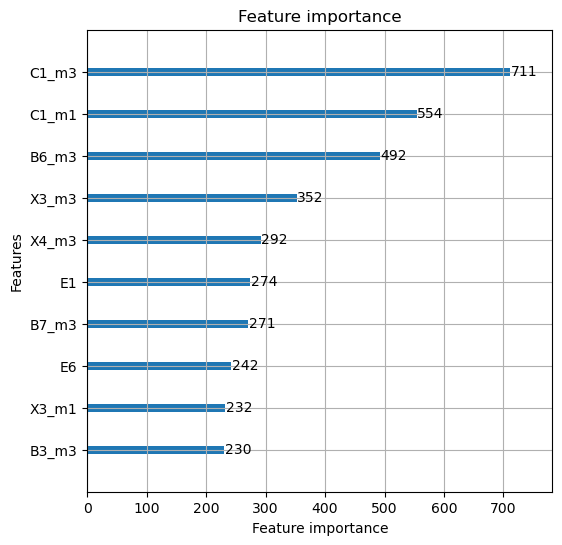

In [70]:
# feature importance 시각화
from lightgbm import plot_importance
import matplotlib.pyplot as plt
%matplotlib inline

f, ax = plt.subplots(figsize=(6, 6))
plot_importance(lgb_clf, max_num_features=10, ax=ax)

In [52]:
# 하이퍼파라미터 
def objectLGBM(trial : Trial, x_train, y_train, x_test, y_test):
    param = {
        'n_estimators' : trial.suggest_int('n_estimators', 100, 1000),
        'min_data_in_leaf' : trial.suggest_int('min_data_in_leaf', 10, 50),
        'learning_rate' : round(trial.suggest_float('learning_rate', 0.1, 3.0), 3),
        'max_depth' : trial.suggest_int('max_depth', 1, 3),
        'num_leaves' : trial.suggest_int('num_leaves', 20, 50),
        'objective' : 'multiclass',
        'use_missing' : False
    }

    LGBM = LGBMClassifier(**param)
    LGBM.fit(x_train, y_train)

    score = f1_score(LGBM.predict(x_test), y_test, average = 'micro')

    return score


In [53]:
study = optuna.create_study(direction = 'maximize', sampler = TPESampler())
study.optimize(lambda trial : objectLGBM(trial, x_train, y_train, x_valid, y_valid), n_trials = 10)
print('Best trial : score {}, \nparams {}'.format(study.best_trial.value, study.best_trial.params))

## Best trial : score 0.7017, 
## params {'n_estimators': 922, 'min_data_in_leaf': 12, 'learning_rate': 0.47726876805428375, 'max_depth': 1, 'num_leaves': 31}

[I 2023-01-29 18:19:22,789] A new study created in memory with name: no-name-1aa02dcf-b153-44db-b7f9-bd4cdaa3b498


[LightGBM] [Warning] min_data_in_leaf is set=23, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=23


[I 2023-01-29 18:19:32,449] Trial 0 finished with value: 0.5242 and parameters: {'n_estimators': 343, 'min_data_in_leaf': 23, 'learning_rate': 2.6269658842714865, 'max_depth': 2, 'num_leaves': 50}. Best is trial 0 with value: 0.5242.


[LightGBM] [Warning] min_data_in_leaf is set=28, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=28


[I 2023-01-29 18:19:44,804] Trial 1 finished with value: 0.2725 and parameters: {'n_estimators': 339, 'min_data_in_leaf': 28, 'learning_rate': 1.369412534146072, 'max_depth': 3, 'num_leaves': 24}. Best is trial 0 with value: 0.5242.


[LightGBM] [Warning] min_data_in_leaf is set=48, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=48


[I 2023-01-29 18:20:06,671] Trial 2 finished with value: 0.548 and parameters: {'n_estimators': 578, 'min_data_in_leaf': 48, 'learning_rate': 1.2418722148597563, 'max_depth': 3, 'num_leaves': 30}. Best is trial 2 with value: 0.548.


[LightGBM] [Warning] min_data_in_leaf is set=12, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=12


[I 2023-01-29 18:20:25,729] Trial 3 finished with value: 0.7017 and parameters: {'n_estimators': 922, 'min_data_in_leaf': 12, 'learning_rate': 0.47726876805428375, 'max_depth': 1, 'num_leaves': 31}. Best is trial 3 with value: 0.7017.


[LightGBM] [Warning] min_data_in_leaf is set=42, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=42


[I 2023-01-29 18:20:42,141] Trial 4 finished with value: 0.4976 and parameters: {'n_estimators': 722, 'min_data_in_leaf': 42, 'learning_rate': 1.8210865098948272, 'max_depth': 3, 'num_leaves': 42}. Best is trial 3 with value: 0.7017.


[LightGBM] [Warning] min_data_in_leaf is set=42, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=42


[I 2023-01-29 18:20:50,781] Trial 5 finished with value: 0.6421 and parameters: {'n_estimators': 256, 'min_data_in_leaf': 42, 'learning_rate': 1.4949436718806617, 'max_depth': 1, 'num_leaves': 44}. Best is trial 3 with value: 0.7017.


[LightGBM] [Warning] min_data_in_leaf is set=19, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=19


[I 2023-01-29 18:21:18,426] Trial 6 finished with value: 0.4996 and parameters: {'n_estimators': 966, 'min_data_in_leaf': 19, 'learning_rate': 1.527369343316057, 'max_depth': 3, 'num_leaves': 28}. Best is trial 3 with value: 0.7017.


[LightGBM] [Warning] min_data_in_leaf is set=34, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=34


[I 2023-01-29 18:21:25,870] Trial 7 finished with value: 0.6247 and parameters: {'n_estimators': 324, 'min_data_in_leaf': 34, 'learning_rate': 1.8767180290056198, 'max_depth': 3, 'num_leaves': 35}. Best is trial 3 with value: 0.7017.


[LightGBM] [Warning] min_data_in_leaf is set=36, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=36


[I 2023-01-29 18:21:34,425] Trial 8 finished with value: 0.3387 and parameters: {'n_estimators': 422, 'min_data_in_leaf': 36, 'learning_rate': 1.9730316792609723, 'max_depth': 2, 'num_leaves': 41}. Best is trial 3 with value: 0.7017.


[LightGBM] [Warning] min_data_in_leaf is set=27, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=27


[I 2023-01-29 18:21:38,149] Trial 9 finished with value: 0.1945 and parameters: {'n_estimators': 132, 'min_data_in_leaf': 27, 'learning_rate': 2.4043647605406626, 'max_depth': 3, 'num_leaves': 44}. Best is trial 3 with value: 0.7017.


Best trial : score 0.7017, 
params {'n_estimators': 922, 'min_data_in_leaf': 12, 'learning_rate': 0.47726876805428375, 'max_depth': 1, 'num_leaves': 31}


In [56]:
optuna.visualization.plot_param_importances(study) # 파라미터 중요도 확인 그래프
optuna.visualization.plot_optimization_history(study) # 최적화 과정 시각화